In [ ]:
import kagglehub
import shutil
import os

# Download dataset
path = kagglehub.dataset_download("parisrohan/credit-score-classification")

current_folder = os.getcwd()

shutil.move(path, current_folder)

print("Dataset moved to:", current_folder)

In [ ]:
!unzip ./data.zip

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./data/train.csv")
df.head()

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [2]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

## Data Cleaning

In [3]:
def remove_underscore(df, col):
    df[col] = df[col].apply(lambda x: str(x).replace("_", "") if str(x) else x)
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [4]:
remove_underscore(df, "Age")
remove_underscore(df, "Annual_Income")
remove_underscore(df, "Outstanding_Debt")
remove_underscore(df, "Monthly_Balance")
remove_underscore(df, "Num_of_Loan")
remove_underscore(df, "Num_of_Delayed_Payment")
remove_underscore(df, "Amount_invested_monthly")
remove_underscore(df, "Credit_Mix")
remove_underscore(df, "Changed_Credit_Limit")

df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].str.strip().str.lower()
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map({'yes': 1, 'no': 0})
df["Credit_Score"] = df["Credit_Score"].map({"Good":2, "Poor":0, "Standard":1})

def convert_to_year_fraction(credit_history_age):
    if pd.isnull(credit_history_age):
        return np.nan
    match = re.match(r"(\d+)\s+Years?\s+and\s+(\d+)\s+Months?", credit_history_age)
    if match:
        years = int(match.group(1))
        months = int(match.group(2))
        return years + months / 12
    return np.nan

df['Credit_History_Age_in_Years'] = df['Credit_History_Age'].apply(convert_to_year_fraction)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,0.0,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2,22.083333
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.944960,NaN,0.0,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2,NaN
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,28.609352,22 Years and 3 Months,0.0,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,2,22.250000
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.377862,22 Years and 4 Months,0.0,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2,22.333333
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,0.0,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2,22.416667


In [5]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,0.0,100000.000000,100000.000000,87993.000000,100000.000000,95521.000000,9.880000e+04,100000.00000,90970.000000
mean,110.649700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,30.923342,10.389025,27.754251,NaN,1426.220376,32.285173,0.594661,1403.118217,637.412998,-3.036437e+22,0.88830,18.432950
std,686.244717,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,62.647879,14.860104,226.031892,6.789496,193.177339,NaN,1155.129026,5.116875,0.490960,8306.041270,2043.319327,3.181295e+24,0.67512,8.311780
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,NaN,0.230000,20.000000,0.000000,0.000000,0.000000,-3.333333e+26,0.00000,0.083333
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,NaN,566.072500,28.052567,0.000000,30.306660,74.534002,2.700922e+02,0.00000,12.000000
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,NaN,1166.155000,32.305784,1.000000,69.249473,135.925682,3.367192e+02,1.00000,18.250000
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,NaN,1945.962500,36.496663,1.000000,161.224249,265.731733,4.702202e+02,1.00000,25.166667
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,NaN,4998.070000,50.000000,1.000000,82331.000000,10000.000000,1.602041e+03,2.00000,33.666667


In [6]:
n = 5

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        print(f"Top {n} rows with the highest values in column '{column}':")
        display(df.nlargest(n, column))
        print("\n")


Top 5 rows with the highest values in column 'Age':


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
71732,0x1ba4e,CUS_0x3909,May,Karen Jacobsk,8698,833-13-6967,Entrepreneur,17423.69,1707.974167,6,...,1158.96,34.351207,31 Years and 6 Months,1.0,0.000000,132.024626,Low_spent_Large_value_payments,308.772790,1,31.500000
82739,0x1facd,CUS_0x5984,April,Jim Wolfk,8697,401-11-2941,Engineer,59992.12,5265.343333,6,...,2600.85,31.899961,6 Years and 5 Months,1.0,349.330723,240.960356,!@9#%8,206.243254,0,6.416667
35557,0xe657,CUS_0x4f3e,June,Beckfordz,8682,341-94-5301,Mechanic,17766.93,1219.577500,5,...,195.48,40.778226,30 Years and 7 Months,0.0,9.712736,57.169214,Low_spent_Small_value_payments,345.075800,1,30.583333
82335,0x1f86d,CUS_0x997,August,enw,8678,914-87-9289,Mechanic,23681.87,1826.489167,3,...,1433.17,31.882977,21 Years and 0 Months,0.0,41.642793,48.424448,High_spent_Small_value_payments,352.581675,1,21.000000
13372,0x645a,CUS_0x5deb,May,"SaPinto"" Tommyl",8674,091-76-5591,Doctor,59681.56,5229.463333,6,...,55.92,25.418201,NaN,0.0,58054.000000,432.654775,Low_spent_Large_value_payments,244.046377,1,NaN




Top 5 rows with the highest values in column 'Annual_Income':


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
48302,0x13104,CUS_0xcfc,July,Catherine Bosleyz,31,555-99-1654,Engineer,24198062.0,1135.525417,4,...,672.49,34.790192,18 Years and 4 Months,0.0,46.388945,53.573863,Low_spent_Large_value_payments,283.589734,2,18.333333
7814,0x43c8,CUS_0xb1a0,July,NaN,17,249-90-4145,Lawyer,24188807.0,1067.655833,8,...,3703.96,41.268945,10 Years and 1 Months,NaN,87.323423,25.385696,High_spent_Small_value_payments,254.056464,1,10.083333
59059,0x1700d,CUS_0x5b6f,April,Forgionej,21,054-49-7239,Mechanic,24177153.0,2373.828333,4,...,1443.42,39.408584,21 Years and 2 Months,0.0,0.000000,136.175542,Low_spent_Medium_value_payments,381.207291,1,21.166667
14588,0x6b7a,CUS_0x6cad,May,Mattl,38,#F%$D@*&8,Teacher,24160009.0,3852.982500,10,...,3148.34,25.225734,12 Years and 11 Months,1.0,196.888046,159.593972,High_spent_Medium_value_payments,278.816232,1,12.916667
27262,0xb5bc,CUS_0x1a23,July,Paige Gancec,51,092-81-2077,Lawyer,24105369.0,3165.787500,3,...,671.94,29.621716,31 Years and 4 Months,0.0,57.514937,237.622977,Low_spent_Medium_value_payments,301.440837,1,31.333333




Top 5 rows with the highest values in column 'Monthly_Inhand_Salary':


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
62728,0x1858e,CUS_0xbcf,January,Lisa Lambertm,44,420-94-4649,Lawyer,179239.6,15204.633333,5,...,1246.12,38.640882,18 Years and 4 Months,0.0,208.797378,100.848772,High_spent_Large_value_payments,1450.817184,2,18.333333
62729,0x1858f,CUS_0xbcf,February,Lisa Lambertm,44,420-94-4649,Lawyer,179239.6,15204.633333,5,...,1246.12,41.838981,18 Years and 5 Months,0.0,208.797378,297.295373,High_spent_Small_value_payments,1274.370582,2,18.416667
62730,0x18590,CUS_0xbcf,March,Lisa Lambertm,44,#F%$D@*&8,Lawyer,179239.6,15204.633333,5,...,1246.12,28.981811,18 Years and 6 Months,0.0,208.797378,1961.218850,Low_spent_Small_value_payments,NaN,2,18.500000
62731,0x18591,CUS_0xbcf,April,Lisa Lambertm,44,420-94-4649,Lawyer,179239.6,15204.633333,5,...,1246.12,46.840987,NaN,0.0,208.797378,213.242371,High_spent_Large_value_payments,1338.423585,1,NaN
62732,0x18592,CUS_0xbcf,May,Lisa Lambertm,44,420-94-4649,Lawyer,179239.6,15204.633333,5,...,1246.12,28.487553,18 Years and 8 Months,0.0,208.797378,658.710760,High_spent_Small_value_payments,912.955195,1,18.666667




Top 5 rows with the highest values in column 'Num_Bank_Accounts':


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
20277,0x8ccf,CUS_0x7fd9,June,en Deightono,55,165-28-2986,Accountant,32946.220,NaN,1798,...,1330.02,21.743562,18 Years and 0 Months,0.0,46.244585,264.366596,Low_spent_Large_value_payments,245.940653,1,18.000000
64537,0x19027,CUS_0x11c1,February,Mark Felsenthalk,34,688-99-5258,Engineer,29902.220,2230.851667,1798,...,533.71,34.380248,19 Years and 9 Months,1.0,66.210327,282.839777,Low_spent_Small_value_payments,164.035063,1,19.750000
29242,0xc158,CUS_0x36a0,March,Jedh,51,881-20-6457,Media_Manager,35976.970,3126.080833,1794,...,568.67,34.730228,31 Years and 4 Months,0.0,53.686329,110.355050,High_spent_Medium_value_payments,398.566704,2,31.333333
69059,0x1aaa5,CUS_0x9a7a,April,Nickn,39,352-84-7006,Writer,81438.560,6989.546667,1794,...,509.44,34.745910,7 Years and 6 Months,1.0,84.273956,195.466316,High_spent_Medium_value_payments,669.214395,1,7.500000
35195,0xe439,CUS_0x3c3a,April,Alexh,37,014-29-7065,Developer,8499.645,817.303750,1793,...,2573.10,34.367790,15 Years and 8 Months,NaN,34.700690,33.569204,Low_spent_Large_value_payments,283.460481,0,15.666667




Top 5 rows with the highest values in column 'Num_Credit_Card':


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
25015,0xa891,CUS_0x1fdc,August,Angela Moona,29,896-78-0268,Accountant,14189.300,973.441667,8,...,1281.77,34.227196,18 Years and 9 Months,NaN,19.792811,90.692474,Low_spent_Small_value_payments,276.858882,0,18.750000
72123,0x1bc99,CUS_0xb987,April,Jessica Wohlz,16,738-03-2141,Scientist,10186.535,552.877917,8,...,2484.47,27.794426,15 Years and 4 Months,1.0,28.824949,37.623726,Low_spent_Small_value_payments,278.839117,0,15.333333
18343,0x8179,CUS_0x5bdb,August,Rv,42,419-12-7067,Engineer,7866.910,814.575833,3,...,1076.09,37.383784,11 Years and 6 Months,1.0,23.926064,10000.000000,!@9#%8,311.938233,1,11.500000
62075,0x181b9,CUS_0x9448,April,Ryan Schladers,41,369-50-5456,_______,79090.740,6676.895000,2,...,753.00,33.061205,NaN,0.0,155.441868,668.314856,Low_spent_Medium_value_payments,123.932777,2,NaN
77711,0x1dd55,CUS_0x25c4,August,Zieminskia,40,967-73-5542,Accountant,14717.280,1069.440000,5,...,148.52,29.772539,21 Years and 6 Months,0.0,31.083719,43.742084,Low_spent_Small_value_payments,322.118197,2,21.500000




Top 5 rows with the highest values in column 'Interest_Rate':


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
71641,0x1b9c7,CUS_0x3fd9,February,Jussih,49,856-12-9184,Engineer,76325.67,6644.472500,5,...,1392.95,38.653956,23 Years and 2 Months,1.0,148.616044,187.252236,High_spent_Small_value_payments,588.578970,1,23.166667
73583,0x1c525,CUS_0x8b85,August,Jessicak,47,927-54-7427,Entrepreneur,56615.10,4908.925000,5,...,1170.66,37.193618,20 Years and 2 Months,0.0,45.618895,135.917012,High_spent_Small_value_payments,569.356593,1,20.166667
23512,0x9fc6,CUS_0x2fab,January,Anna Yukhananovd,26,411-00-6543,Manager,75804.94,6120.078333,0,...,330.82,35.641926,31 Years and 9 Months,0.0,141.289448,51.867242,High_spent_Large_value_payments,658.851143,2,31.750000
88505,0x21c97,CUS_0x19a8,February,NaN,42,738-50-7769,Musician,30683.42,2397.951667,4,...,7.24,29.706823,NaN,0.0,46.884456,64.523403,High_spent_Medium_value_payments,378.387307,1,NaN
77710,0x1dd54,CUS_0x25c4,July,Zieminskia,40,967-73-5542,Accountant,14717.28,1069.440000,5,...,148.52,28.221988,21 Years and 5 Months,0.0,58962.000000,17.478496,High_spent_Large_value_payments,298.381784,1,21.416667




Top 5 rows with the highest values in column 'Num_of_Loan':


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
74808,0x1cc56,CUS_0x15a7,January,Philippy,21,755-77-1230,Mechanic,120368.32,10210.693333,1,...,785.01,26.196732,NaN,0.0,288.949692,228.021229,High_spent_Large_value_payments,744.098412,1,NaN
30391,0xc811,CUS_0x90cf,August,McCoolw,53,058-50-1241,Media_Manager,106234.11,8699.842500,4,...,939.40,36.009422,NaN,0.0,201.113490,625.847156,Low_spent_Large_value_payments,313.023604,1,NaN
3059,0x27ed,CUS_0xaf23,April,Nick Edwardsg,37,231-01-3965,_______,17164.72,1223.393333,10,...,4813.02,29.959176,10 Years and 8 Months,1.0,99.126378,63.569916,Low_spent_Large_value_payments,229.643039,0,10.666667
28428,0xbc92,CUS_0x272a,May,Katharinax,25,444-95-6664,Teacher,29633.99,2370.499167,7,...,113.42,36.076178,6 Years and 2 Months,NaN,32.226013,89.058968,High_spent_Small_value_payments,375.764936,1,6.166667
58597,0x16d57,CUS_0x3941,June,Mirna Sleimane,17,782-05-3224,Accountant,59993.32,4957.443333,5,...,1326.50,31.146913,9 Years and 8 Months,1.0,205.989320,57.656451,High_spent_Large_value_payments,472.098563,1,9.666667




Top 5 rows with the highest values in column 'Delay_from_due_date':


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
477,0x18cb,CUS_0x8f17,June,Ermans,46,794-17-4490,_______,41746.76,3651.896667,8,...,1936.79,32.159610,19 Years and 6 Months,1.0,102.283398,199.127606,High_spent_Small_value_payments,323.778663,0,19.500000
13913,0x6787,CUS_0x7df,February,Juliend,26,556-57-5003,Accountant,14406.71,1236.559167,973,...,1286.90,27.285234,NaN,1.0,53.550032,159.603762,Low_spent_Small_value_payments,200.502123,1,NaN
13919,0x678d,CUS_0x7df,August,Juliend,26,556-57-5003,Accountant,14406.71,1236.559167,6,...,1286.90,34.860396,17 Years and 6 Months,1.0,53.550032,119.528636,Low_spent_Small_value_payments,240.577249,0,17.500000
18945,0x8503,CUS_0x7e3e,February,NaN,30,230-16-9822,Engineer,80932.92,6759.410000,8,...,2696.09,42.047788,15 Years and 10 Months,1.0,192.810878,101.123272,High_spent_Large_value_payments,622.006850,0,15.833333
22648,0x9ab6,CUS_0x910a,January,Lynchp,16,924-42-4638,Mechanic,16701.54,1555.795000,7,...,3356.86,26.584542,3 Years and 5 Months,1.0,45.012674,141.718752,Low_spent_Medium_value_payments,248.848074,1,3.416667




Top 5 rows with the highest values in column 'Num_of_Delayed_Payment':


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
51565,0x14423,CUS_0x8f59,June,Jessicad,36,705-77-2792,Mechanic,24577.48,2055.123333,5,...,844.54,37.564481,14 Years and 7 Months,1.0,95.538487,105.950033,Low_spent_Small_value_payments,294.023813,1,14.583333
82232,0x1f7d6,CUS_0xbc0c,January,Rascoey,50,157-90-1957,Scientist,32637.88,2514.823333,5,...,1061.77,35.623966,17 Years and 3 Months,1.0,69.574057,27.566888,High_spent_Medium_value_payments,404.341388,1,17.250000
31796,0xd04e,CUS_0x8636,May,Alexeiy,33,644-42-8469,Mechanic,101342.20,8444.183333,2,...,828.02,40.074788,7 Years and 2 Months,1.0,114.329989,446.169384,Low_spent_Large_value_payments,553.918960,1,7.166667
63043,0x18765,CUS_0x3a06,April,Janes,32,079-88-9608,Journalist,30560.73,2692.727500,5,...,1354.32,33.602418,24 Years and 10 Months,0.0,73.513154,258.542228,Low_spent_Small_value_payments,227.217368,2,24.833333
95038,0x242dc,CUS_0xb6e0,July,Aditi Shahb,24,318-50-9417,Manager,157794.60,13225.550000,3,...,1198.78,38.190160,27 Years and 4 Months,0.0,261.873309,1319.227586,Low_spent_Medium_value_payments,21.454105,1,27.333333




Top 5 rows with the highest values in column 'Changed_Credit_Limit':


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
21807,0x95c5,CUS_0x64a4,August,Oliver Hirtj,46,907-98-0707,Developer,35372.36,2865.696667,8,...,3850.97,34.483402,7 Years and 8 Months,1.0,173.241966,77.477504,High_spent_Medium_value_payments,285.850197,1,7.666667
45056,0x11e02,CUS_0xb017,January,Yukhananovn,42,542-27-9387,_______,15766.76,1288.896667,8,...,3479.89,29.722702,NaN,NaN,76.953045,111.137948,Low_spent_Small_value_payments,230.798674,1,NaN
36433,0xeb7b,CUS_0xc702,February,Renee Maltezoua,28,559-27-4003,Manager,31959.40,2472.283333,8,...,2753.45,38.561521,5 Years and 10 Months,1.0,201.319053,79.984039,High_spent_Medium_value_payments,215.925242,1,5.833333
82009,0x1f687,CUS_0x744f,February,Maashov,26,528-53-4876,Doctor,9527.09,604.924167,8,...,4208.66,27.889116,14 Years and 0 Months,1.0,61.729526,35.357573,Low_spent_Medium_value_payments,243.405318,1,14.000000
62677,0x1853f,CUS_0xa610,June,Strupczewskid,38,548-77-4930,Accountant,62616.99,NaN,7,...,4420.25,39.108421,3 Years and 3 Months,1.0,322.548211,152.403036,High_spent_Medium_value_payments,302.157003,1,3.250000




Top 5 rows with the highest values in column 'Num_Credit_Inquiries':


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
37718,0xf300,CUS_0x9b8b,July,Karen Freifeldr,37,963-35-0135,Journalist,8940.14,933.011667,3,...,1250.27,27.465214,NaN,1.0,35.221703,20.945038,High_spent_Medium_value_payments,287.134426,1,NaN
19525,0x8867,CUS_0x41f0,June,Katen,18,803-57-7987,Teacher,18507.00,1561.250000,6,...,1814.83,33.192739,10 Years and 1 Months,1.0,34.039146,50.109781,Low_spent_Medium_value_payments,351.976073,1,10.083333
4880,0x329a,CUS_0x84da,January,Tara LaCapraa,54,#F%$D@*&8,Doctor,130688.56,11134.713333,0,...,466.13,27.269504,15 Years and 8 Months,NaN,0.000000,663.033973,Low_spent_Medium_value_payments,730.437360,2,15.666667
57989,0x169c7,CUS_0x554b,June,Alexeih,53,776-27-8471,Entrepreneur,15127.05,1482.339210,8,...,194.30,32.624698,26 Years and 1 Months,0.0,93.510337,76.233564,Low_spent_Medium_value_payments,324.763139,1,26.083333
52054,0x14700,CUS_0x87c5,July,Jonathan Cableo,40,362-65-9938,Doctor,120174.40,10016.533333,7,...,828.59,30.582894,18 Years and 1 Months,1.0,94.898454,660.802838,Low_spent_Small_value_payments,535.952041,1,18.083333




Top 5 rows with the highest values in column 'Credit_Mix':


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years




Top 5 rows with the highest values in column 'Outstanding_Debt':


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
8736,0x4932,CUS_0xc5ee,January,Chris Petersw,23,#F%$D@*&8,Mechanic,50043.27,4132.272500,7,...,4998.07,38.247029,6 Years and 4 Months,1.0,184.879182,10000.000000,High_spent_Medium_value_payments,388.473303,1,6.333333
8737,0x4933,CUS_0xc5ee,February,NaN,24,534-84-1363,Mechanic,50043.27,4132.272500,7,...,4998.07,35.968020,6 Years and 5 Months,1.0,184.879182,69.799383,!@9#%8,398.548685,1,6.416667
8738,0x4934,CUS_0xc5ee,March,Chris Petersw,24,534-84-1363,Mechanic,50043.27,4132.272500,7,...,4998.07,30.737818,6 Years and 6 Months,1.0,184.879182,80.925275,High_spent_Small_value_payments,407.422793,1,6.500000
8739,0x4935,CUS_0xc5ee,April,Chris Petersw,24,#F%$D@*&8,Mechanic,50043.27,NaN,7,...,4998.07,35.833785,NaN,1.0,184.879182,112.950269,High_spent_Medium_value_payments,365.397799,2,NaN
8740,0x4936,CUS_0xc5ee,May,Chris Petersw,24,534-84-1363,_______,50043.27,3797.351204,7,...,4998.07,26.543491,NaN,1.0,519.800477,47.031992,High_spent_Medium_value_payments,431.316076,2,NaN




Top 5 rows with the highest values in column 'Credit_Utilization_Ratio':


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
9382,0x4cf8,CUS_0x3655,July,NaN,30,512-00-8324,Lawyer,177907.72,13078.430052,0,...,685.01,50.000000,31 Years and 1 Months,0.0,1634.213281,188.162068,High_spent_Medium_value_payments,1533.102266,1,31.083333
68000,0x1a472,CUS_0x751c,January,Jessican,19,220-63-1416,Accountant,177696.92,15090.076667,5,...,1182.91,49.564519,25 Years and 5 Months,0.0,74.732590,121.328983,High_spent_Large_value_payments,1552.946094,1,25.416667
17029,0x79c7,CUS_0x9f7a,June,Dave Clarkes,55,692-62-0934,Writer,178793.92,14642.493333,1,...,1015.37,49.522324,21 Years and 9 Months,0.0,0.000000,137.636169,High_spent_Large_value_payments,1566.613165,2,21.750000
62954,0x186e0,CUS_0xa99a,March,Luciad,55,670-51-6382,Teacher,177846.68,14855.556667,210,...,166.75,49.254983,25 Years and 11 Months,NaN,0.000000,183.280971,High_spent_Large_value_payments,1542.274695,1,25.916667
87595,0x21741,CUS_0x1bde,April,en Hirschlere,36,027-51-8010,Manager,170730.60,14353.550000,594,...,327.43,49.064277,20 Years and 0 Months,0.0,0.000000,164.591576,High_spent_Large_value_payments,1510.763424,1,20.000000




Top 5 rows with the highest values in column 'Payment_of_Min_Amount':


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
32,0x1632,CUS_0x1cdb,January,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,...,943.86,39.797764,30 Years and 8 Months,1.0,0.0,276.725394,!@9#%8,288.605522,1,30.666667
34,0x1634,CUS_0x1cdb,March,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,...,943.86,23.462303,30 Years and 10 Months,1.0,0.0,173.138651,Low_spent_Medium_value_payments,392.192266,1,30.833333
35,0x1635,CUS_0x1cdb,April,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,...,943.86,28.924954,30 Years and 11 Months,1.0,0.0,96.785485,High_spent_Medium_value_payments,438.545432,1,30.916667
36,0x1636,CUS_0x1cdb,May,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,...,943.86,41.776187,31 Years and 0 Months,1.0,0.0,62.723278,High_spent_Small_value_payments,482.607638,1,31.000000
37,0x1637,CUS_0x1cdb,June,Deepaa,21,615-06-7821,Developer,35547.71,NaN,7,...,943.86,29.217556,31 Years and 1 Months,1.0,0.0,37.643638,High_spent_Medium_value_payments,497.687279,1,31.083333




Top 5 rows with the highest values in column 'Total_EMI_per_month':


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
87013,0x213d7,CUS_0x2a3a,June,Clarei,26,497-15-6884,Mechanic,15704.000,1606.519563,6,...,2617.78,32.167130,13 Years and 3 Months,NaN,82331.0,88.291602,Low_spent_Small_value_payments,284.768410,0,13.250000
15300,0x6fa6,CUS_0x36fb,May,Levineo,32,465-97-6079,Lawyer,20501.670,NaN,6,...,3373.13,30.397662,9 Years and 2 Months,1.0,82256.0,51.560372,Low_spent_Large_value_payments,286.958740,0,9.166667
29514,0xc2f0,CUS_0x1b8a,March,Ryanu,32,577-72-6050,Teacher,44927.860,3687.988333,4,...,762.62,35.628503,20 Years and 11 Months,0.0,82236.0,198.591737,High_spent_Small_value_payments,328.016767,2,20.916667
3084,0x2812,CUS_0x7812,May,Davev,21,992-47-8736,Scientist,19653.005,1581.750417,3,...,919.98,34.606272,17 Years and 8 Months,0.0,82204.0,103.354231,Low_spent_Medium_value_payments,296.708255,2,17.666667
51614,0x1446c,CUS_0x985e,July,David Jonesm,23,207-73-2763,Doctor,63983.160,5318.930000,9,...,3622.14,37.865426,11 Years and 1 Months,1.0,82193.0,81.860988,High_spent_Large_value_payments,500.971858,1,11.083333




Top 5 rows with the highest values in column 'Amount_invested_monthly':


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,_______,143162.64,NaN,1,...,1303.01,26.519815,17 Years and 11 Months,0.0,246.992319,10000.0,High_spent_Small_value_payments,715.741367,2,17.916667
23,0x1621,CUS_0x2dbc,August,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,1303.01,38.374753,18 Years and 4 Months,0.0,246.992319,10000.0,High_spent_Small_value_payments,895.494583,1,18.333333
28,0x162a,CUS_0xb891,May,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,632.46,41.154317,17 Years and 7 Months,0.0,16.415452,10000.0,Low_spent_Large_value_payments,359.374916,1,17.583333
121,0x16b7,CUS_0x33d2,February,Chalmersa,30,965-46-2491,Scientist,31993.78,2942.148333,6,...,818.22,37.958569,16 Years and 11 Months,1.0,45.141298,10000.0,Low_spent_Small_value_payments,157.869804,1,16.916667
142,0x16d4,CUS_0xfdb,July,Patrickg,46,928-91-4452,Teacher,32284.62,2898.385000,6,...,1283.37,24.205533,6 Years and 11 Months,1.0,103.037560,10000.0,Low_spent_Small_value_payments,85.902095,1,6.916667




Top 5 rows with the highest values in column 'Monthly_Balance':


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
9376,0x4cf2,CUS_0x3655,January,Ransdellw,29,512-00-8324,Lawyer,177907.72,14712.643333,0,...,685.01,39.432897,30 Years and 7 Months,0.0,0.0,10000.000000,High_spent_Large_value_payments,1602.040519,0,30.583333
7475,0x41cd,CUS_0x6479,April,Oranw,33,219-01-0237,Accountant,177887.80,14828.983333,4,...,925.47,44.783892,26 Years and 7 Months,0.0,0.0,146.609398,High_spent_Large_value_payments,1576.288935,1,26.583333
33072,0xd7ca,CUS_0x26fd,January,Lucianau,32,982-46-6532,Scientist,178328.88,14771.740000,4,...,708.22,40.541257,16 Years and 1 Months,0.0,0.0,149.965691,High_spent_Large_value_payments,1567.208309,2,16.083333
17029,0x79c7,CUS_0x9f7a,June,Dave Clarkes,55,692-62-0934,Writer,178793.92,14642.493333,1,...,1015.37,49.522324,21 Years and 9 Months,0.0,0.0,137.636169,High_spent_Large_value_payments,1566.613165,2,21.750000
15878,0x7308,CUS_0xa05d,July,Donny Kwokh,30,445-30-2049,Scientist,177546.36,14813.530000,5,...,715.97,34.860662,30 Years and 4 Months,0.0,50084.0,157.218174,!@9#%8,1564.134826,1,30.333333




Top 5 rows with the highest values in column 'Credit_Score':


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,0.0,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2,22.083333
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.944960,NaN,0.0,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2,NaN
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,28.609352,22 Years and 3 Months,0.0,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,2,22.250000
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.377862,22 Years and 4 Months,0.0,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2,22.333333
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,0.0,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2,22.416667




Top 5 rows with the highest values in column 'Credit_History_Age_in_Years':


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
775,0x1a89,CUS_0x3f04,August,Jenniferu,25,465-93-9571,_______,43758.340,3454.528333,5,...,1194.28,35.742540,33 Years and 8 Months,0.0,56.311421,364.237993,Low_spent_Small_value_payments,214.903420,2,33.666667
31431,0xce29,CUS_0xfaf,August,Sveap,27,153-48-5124,Architect,39255.540,3546.295000,4,...,536.03,29.893853,33 Years and 8 Months,0.0,46.034586,53.697186,High_spent_Large_value_payments,494.897728,2,33.666667
33775,0xdbe5,CUS_0x19a3,August,Rigbyl,41,719-96-4265,Lawyer,15636.605,NaN,8,...,592.29,33.461807,33 Years and 8 Months,0.0,43.516348,57.445399,Low_spent_Small_value_payments,346.543295,0,33.666667
37239,0xf031,CUS_0x9867,August,Nishantz,32,#F%$D@*&8,Architect,104506.980,8986.915000,5,...,684.55,33.736034,33 Years and 8 Months,0.0,340.104957,628.926429,!@9#%8,219.660114,2,33.666667
40663,0x10441,CUS_0xbf03,August,"""Michael OBoyle""w",44,889-89-7508,Doctor,30231.090,2610.257500,3,...,1263.11,38.109592,33 Years and 8 Months,0.0,55.943907,65.314439,High_spent_Large_value_payments,379.767404,1,33.666667


In [7]:
print("==================================================================")
# Step 1: Remove the top 1% of rows with the highest annual income.
quantiles = df['Annual_Income'].quantile([0.25, 0.50, 0.75, 0.90, 0.95, 0.98, 0.99, 0.995, 0.998])
print("Annual Income Quantiles:")
print(quantiles)
q99 = quantiles[0.99]
df_filtered = df[df['Annual_Income'] <= q99].copy()
print(f"Rows remaining after filtering top 1% on annual income: {len(df_filtered)}")
print("==================================================================")

# Step 2: Remove the top 2% of rows with the most bank accounts.
quantiles = df_filtered['Num_Bank_Accounts'].quantile([0.25, 0.50, 0.75, 0.90, 0.95, 0.97, 0.98, 0.99, 0.995])
print("Number of Bank Accounts Quantiles:")
print(quantiles)
q98 = quantiles[0.98]
df_filtered = df_filtered[(df_filtered['Num_Bank_Accounts'] <= q98) & (df_filtered["Num_Bank_Accounts"] >= 0)]
print(f"Rows remaining after filtering top 2% on number of bank accounts: {len(df_filtered)}")
print("==================================================================")

# Step 3: Remove the top 3% of rows with the highest number of credit cards.
quantiles = df_filtered['Num_Credit_Card'].quantile([0.25, 0.50, 0.75, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995])
print("Number of Credit Card Quantiles:")
print(quantiles)
q97 = quantiles[0.97]
df_filtered = df_filtered[(df_filtered['Num_Credit_Card'] <= q97) & (df_filtered["Num_Credit_Card"] >= 0)]
print(f"Rows remaining after filtering top 3% on number of credit cards: {len(df_filtered)}")
print("==================================================================")

# Step 4: Remove the top 2% of rows with the most credit inquiries.
quantiles = df_filtered['Num_Credit_Inquiries'].quantile([0.25, 0.50, 0.75, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995])
print("Number of Credit Inquiries Quantiles:")
print(quantiles)
q98 = quantiles[0.98]
df_filtered = df_filtered[(df_filtered['Num_Credit_Inquiries'] <= q98) & (df_filtered["Num_Credit_Inquiries"] >= 0)]
print(f"Rows remaining after filtering top 2% on number of credit inquiries: {len(df_filtered)}")
print("==================================================================")

# Step 5: Remove the top 0.47% of rows with the most loans.
quantiles = df_filtered['Num_of_Loan'].quantile([0.25, 0.50, 0.75, 0.90, 0.97, 0.98, 0.99, 0.995, 0.9951, 0.9953, 0.9954, 0.996, 0.998])
print("Number of Loans Quantiles:")
print(quantiles)
q9953 = quantiles[0.9953]
df_filtered = df_filtered[(df_filtered['Num_of_Loan'] <= q9953) & (df_filtered["Num_of_Loan"] >= 0)]
print(f"Rows remaining after filtering top 0.47% on number of loans: {len(df_filtered)}")
print("==================================================================")

# Step 6: Remove the top 0.8% of rows with the highest number of delayed payments.
quantiles = df_filtered['Num_of_Delayed_Payment'].quantile([0.25, 0.50, 0.75, 0.90, 0.97, 0.98, 0.99, 0.991, 0.992, 0.993, 0.995])
print("Number of Delayed Payments Quantiles:")
print(quantiles)
q992 = quantiles[0.992]
df_filtered = df_filtered[(df_filtered['Num_of_Delayed_Payment'] <= q992) & (df_filtered["Num_of_Delayed_Payment"] >= 0)]
print(f"Rows remaining after filtering top 0.8% on number of delayed payments: {len(df_filtered)}")
print("==================================================================")

# Step 7: Filter out rows with negative monthly balance values.
quantiles = df_filtered['Monthly_Balance'].quantile([0.25, 0.50, 0.75, 0.90, 0.97, 0.98, 0.99, 0.991, 0.992, 0.993, 0.995, 0.998, 0.9999])
print("Monthly Balance Quantiles:")
print(quantiles)
df_filtered = df_filtered[(df_filtered["Monthly_Balance"] >= 0)]
print(f"Rows remaining after filtering on monthly balance: {len(df_filtered)}")
print("==================================================================")

# Step 8: Handle abnormal values in age by setting out-of-range ages to NaN and interpolating.
df_filtered.loc[(df_filtered['Age'] < 0) | (df_filtered['Age'] > 100), 'Age'] = pd.NA
df_filtered['Age'] = df_filtered.groupby('Name')['Age'].transform(lambda x: x.interpolate(method='linear'))
print("Handled abnormal age values with interpolation where possible.")
print("==================================================================")

# Step 9: Fill missing values for Monthly Inhand Salary using linear interpolation.
df_filtered['Monthly_Inhand_Salary'] = df_filtered.groupby('Name')['Monthly_Inhand_Salary'].transform(lambda x: x.interpolate(method='linear'))

# Step 10: Drop rows with missing values in Age, Outstanding Debt, and Monthly Balance.
df_filtered.dropna(subset=["Age", "Outstanding_Debt", "Monthly_Balance"], inplace=True)
print(f"Rows remaining after dropping rows with missing values in critical fields: {len(df_filtered)}")
print("==================================================================")

df_filtered.head()

Annual Income Quantiles:
0.250    1.945750e+04
0.500    3.757861e+04
0.750    7.279092e+04
0.900    1.130859e+05
0.950    1.345333e+05
0.980    1.668376e+05
0.990    1.799873e+05
0.995    1.292096e+07
0.998    1.964043e+07
Name: Annual_Income, dtype: float64
Rows remaining after filtering top 1% on annual income: 99001
Number of Bank Accounts Quantiles:
0.250       3.0
0.500       6.0
0.750       7.0
0.900       9.0
0.950      10.0
0.970      10.0
0.980      10.0
0.990     446.0
0.995    1096.0
Name: Num_Bank_Accounts, dtype: float64
Rows remaining after filtering top 2% on number of bank accounts: 97670
Number of Credit Card Quantiles:
0.250       4.0
0.500       5.0
0.750       7.0
0.900       9.0
0.950      10.0
0.960      10.0
0.970      10.0
0.980     172.0
0.990     849.0
0.995    1177.0
Name: Num_Credit_Card, dtype: float64
Rows remaining after filtering top 3% on number of credit cards: 95417
Number of Credit Inquiries Quantiles:
0.250       3.000
0.500       6.000
0.750       

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,0.0,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2,22.083333
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,31.377862,22 Years and 4 Months,0.0,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2,22.333333
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,27.262259,22 Years and 6 Months,0.0,49.574949,62.430172,!@9#%8,340.479212,2,22.500000
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,22.537593,22 Years and 7 Months,0.0,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,2,22.583333
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,605.03,24.464031,26 Years and 7 Months,0.0,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,1,26.583333


In [8]:
df_filtered.describe()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
count,69508.000000,67795.000000,69508.000000,69508.000000,69508.000000,69508.000000,69508.000000,69508.000000,68020.000000,69508.000000,0.0,69508.000000,69508.000000,61208.000000,69508.000000,66401.000000,69508.000000,69508.000000,63232.000000
mean,49946.836075,4149.482138,5.382014,5.536917,73.457544,3.521249,21.104664,13.396242,10.403430,5.767710,NaN,1424.093054,32.323161,0.598419,1445.047351,620.763626,401.708914,0.884359,18.437406
std,37963.757936,3149.250082,2.577827,2.056380,472.617255,2.437932,14.826545,6.194542,6.784092,3.815303,NaN,1152.271076,5.111143,0.490222,8447.703648,2023.485244,213.192381,0.673136,8.316392
min,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,-6.480000,0.000000,NaN,0.230000,20.881250,0.000000,0.000000,0.000000,0.088628,0.000000,0.083333
25%,19269.565000,1625.000000,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.340000,3.000000,NaN,565.720000,28.105165,0.000000,30.093714,73.765684,269.823584,0.000000,12.000000
50%,36661.930000,3060.806667,6.000000,5.000000,14.000000,3.000000,18.000000,14.000000,9.430000,5.000000,NaN,1165.700000,32.348978,1.000000,68.410772,133.815171,336.508432,1.000000,18.333333
75%,70978.525000,5900.552500,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.900000,8.000000,NaN,1945.190000,36.535470,1.000000,155.963818,257.279885,468.830628,1.000000,25.166667
max,179987.280000,15204.633333,10.000000,10.000000,5789.000000,19.000000,67.000000,28.000000,36.490000,16.000000,NaN,4998.070000,49.564519,1.000000,82331.000000,10000.000000,1602.040519,2.000000,33.666667


## Data Visualization

### Single Column Distributions

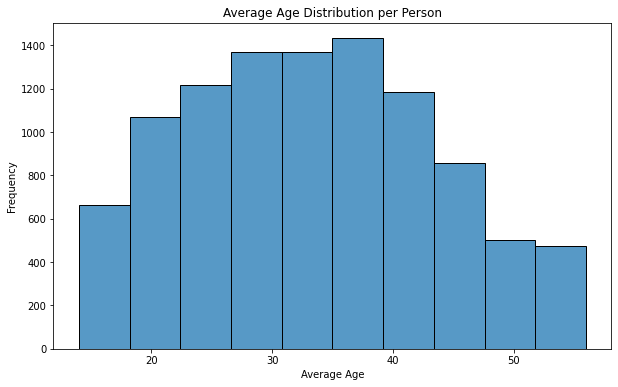

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_age_per_person = df_filtered.groupby('Name')['Age'].mean()


plt.figure(figsize=(10, 6))
sns.histplot(avg_age_per_person, bins=10)
plt.title('Average Age Distribution per Person')
plt.xlabel('Average Age')
plt.ylabel('Frequency')
plt.show()


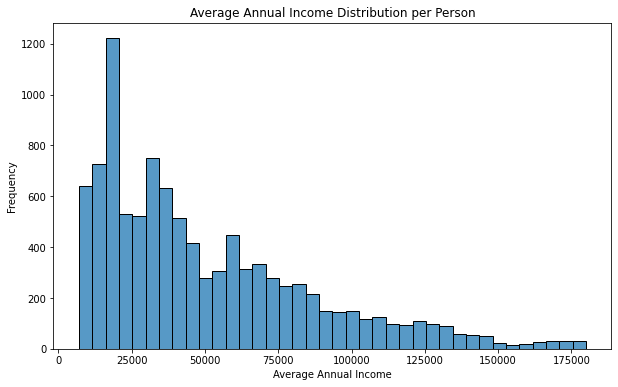

In [10]:
avg_aincome_pperson = df_filtered.groupby('Name')['Annual_Income'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(avg_aincome_pperson)
plt.title('Average Annual Income Distribution per Person')
plt.xlabel('Average Annual Income')
plt.ylabel('Frequency')
plt.show()


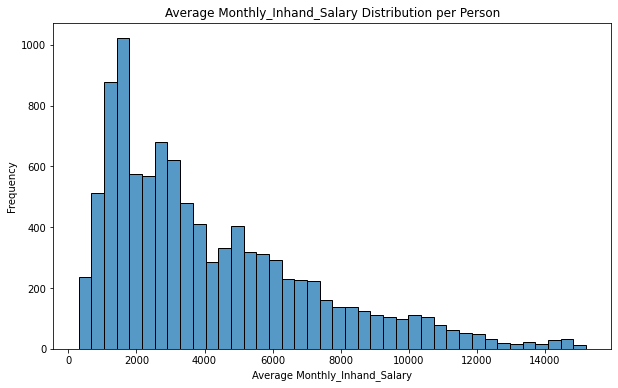

In [11]:
avg_monthly_inhand_salary_pperson = df_filtered.groupby('Name')['Monthly_Inhand_Salary'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(avg_monthly_inhand_salary_pperson)
plt.title('Average Monthly_Inhand_Salary Distribution per Person')
plt.xlabel('Average Monthly_Inhand_Salary')
plt.ylabel('Frequency')
plt.show()


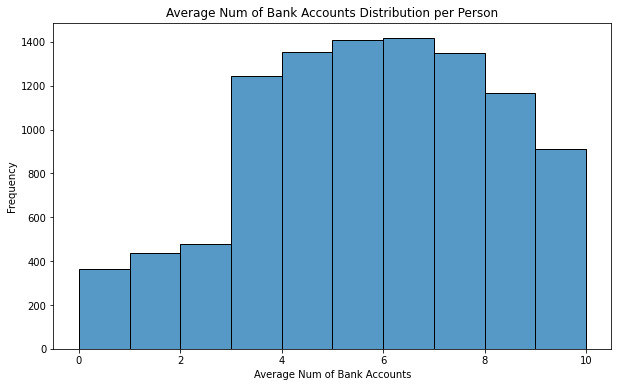

In [12]:
avg_num_bank_account_pperson = df_filtered.groupby('Name')['Num_Bank_Accounts'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(avg_num_bank_account_pperson, bins=10)
plt.title('Average Num of Bank Accounts Distribution per Person')
plt.xlabel('Average Num of Bank Accounts')
plt.ylabel('Frequency')
plt.show()

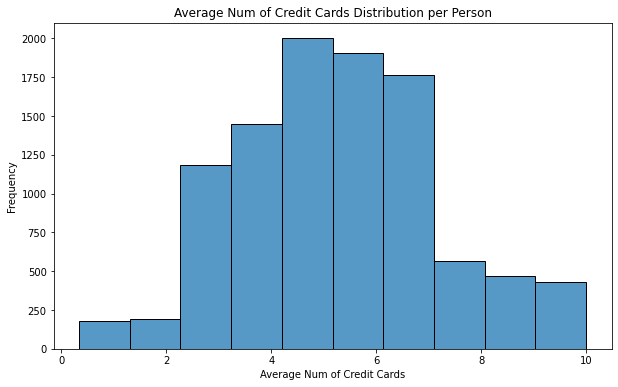

In [13]:
avg_num_credit_card_pperson = df_filtered.groupby('Name')['Num_Credit_Card'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(avg_num_credit_card_pperson, bins=10)
plt.title('Average Num of Credit Cards Distribution per Person')
plt.xlabel('Average Num of Credit Cards')
plt.ylabel('Frequency')
plt.show()

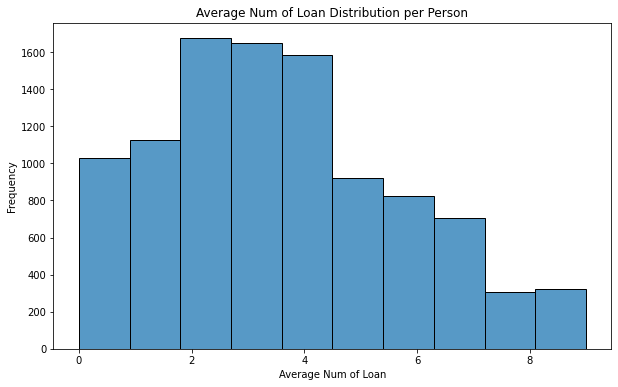

In [14]:
avg_num_loan_pperson = df_filtered.groupby('Name')['Num_of_Loan'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(avg_num_loan_pperson, bins=10)
plt.title('Average Num of Loan Distribution per Person')
plt.xlabel('Average Num of Loan')
plt.ylabel('Frequency')
plt.show()

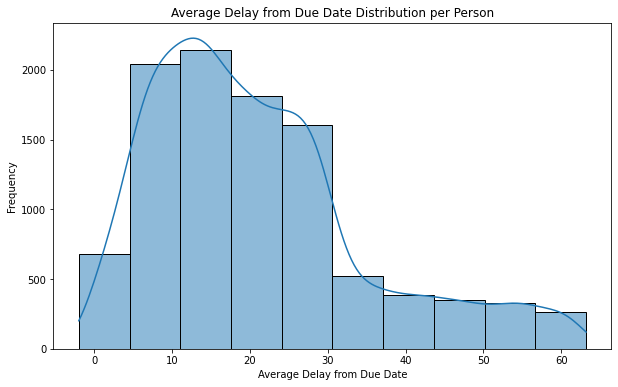

In [15]:
avg_delay_from_due_date_pperson = df_filtered.groupby('Name')['Delay_from_due_date'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(avg_delay_from_due_date_pperson, bins=10, kde=True)
plt.title('Average Delay from Due Date Distribution per Person')
plt.xlabel('Average Delay from Due Date')
plt.ylabel('Frequency')
plt.show()

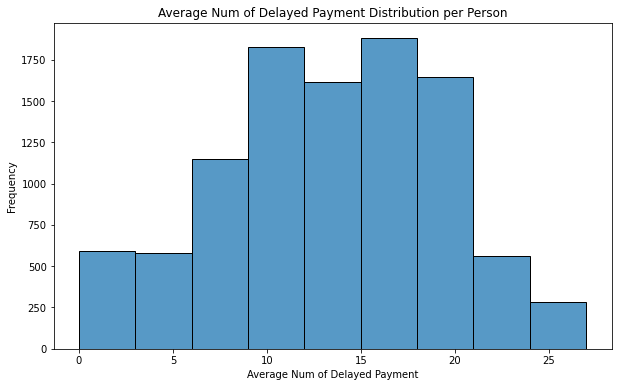

In [16]:
avg_num_delayed_payment_pperson = df_filtered.groupby('Name')['Num_of_Delayed_Payment'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(avg_num_delayed_payment_pperson, bins=9)
plt.title('Average Num of Delayed Payment Distribution per Person')
plt.xlabel('Average Num of Delayed Payment')
plt.ylabel('Frequency')
plt.show()

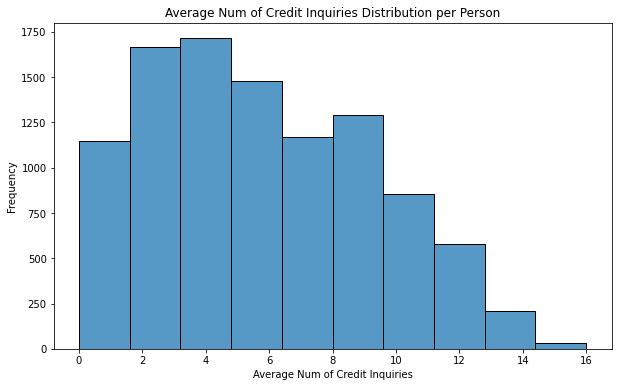

In [17]:
avg_num_credit_inquiries_pperson = df_filtered.groupby('Name')['Num_Credit_Inquiries'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(avg_num_credit_inquiries_pperson, bins=10)
plt.title('Average Num of Credit Inquiries Distribution per Person')
plt.xlabel('Average Num of Credit Inquiries')
plt.ylabel('Frequency')
plt.show()

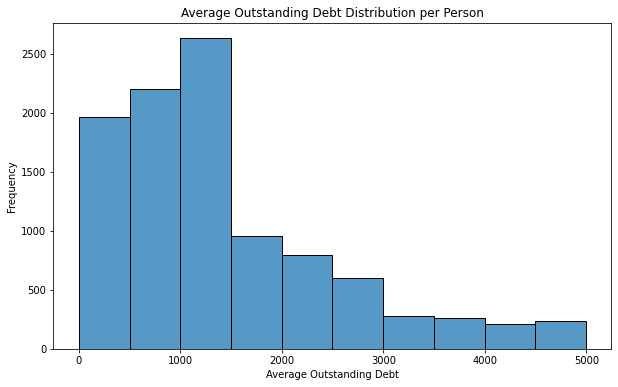

In [18]:
avg_outstanding_debt_pperson = df_filtered.groupby('Name')['Outstanding_Debt'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(avg_outstanding_debt_pperson, bins=10)
plt.title('Average Outstanding Debt Distribution per Person')
plt.xlabel('Average Outstanding Debt')
plt.ylabel('Frequency')
plt.show()

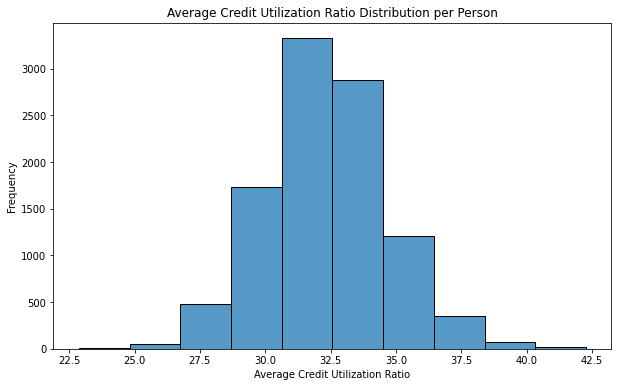

In [19]:
avg_credit_util_ratio_pperson = df_filtered.groupby('Name')['Credit_Utilization_Ratio'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(avg_credit_util_ratio_pperson, bins=10)
plt.title('Average Credit Utilization Ratio Distribution per Person')
plt.xlabel('Average Credit Utilization Ratio')
plt.ylabel('Frequency')
plt.show()

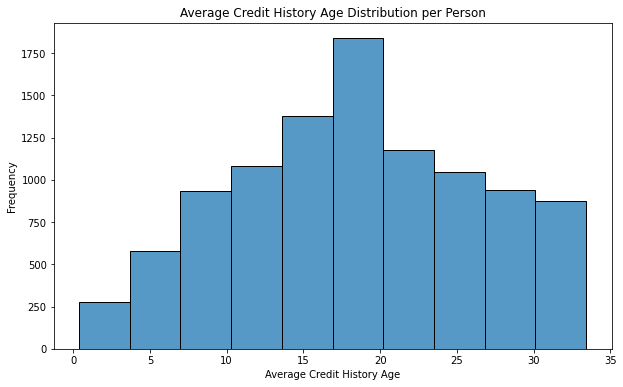

In [20]:
avg_credit_history_age_pperson = df_filtered.groupby('Name')['Credit_History_Age_in_Years'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(avg_credit_history_age_pperson, bins=10)
plt.title('Average Credit History Age Distribution per Person')
plt.xlabel('Average Credit History Age')
plt.ylabel('Frequency')
plt.show()

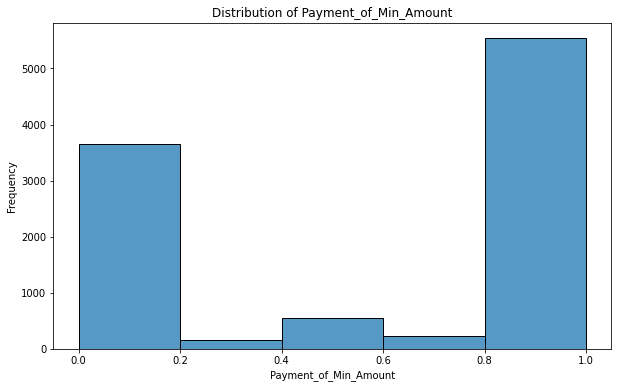

In [21]:
avg_credit_history_age_pperson = df_filtered.groupby('Name')['Payment_of_Min_Amount'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(avg_credit_history_age_pperson, bins=5)
plt.title('Distribution of Payment_of_Min_Amount')
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('Frequency')
plt.show()

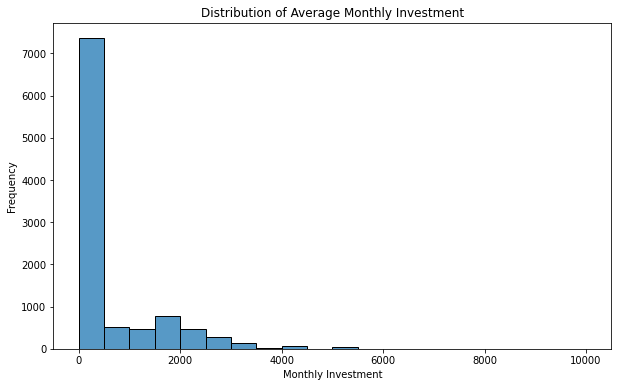

In [22]:
avg_monthly_investment_pperson = df_filtered.groupby('Name')['Amount_invested_monthly'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(avg_monthly_investment_pperson, bins=20)
plt.title('Distribution of Average Monthly Investment')
plt.xlabel('Monthly Investment')
plt.ylabel('Frequency')
plt.show()

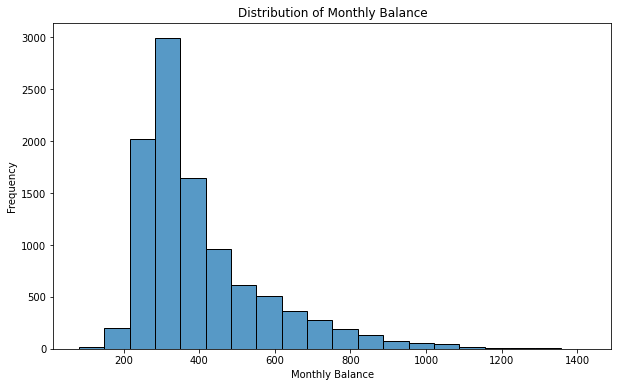

In [23]:
avg_monthly_balance_pperson = df_filtered.groupby('Name')['Monthly_Balance'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(avg_monthly_balance_pperson, bins=20)
plt.title('Distribution of Monthly Balance')
plt.xlabel('Monthly Balance')
plt.ylabel('Frequency')
plt.show()

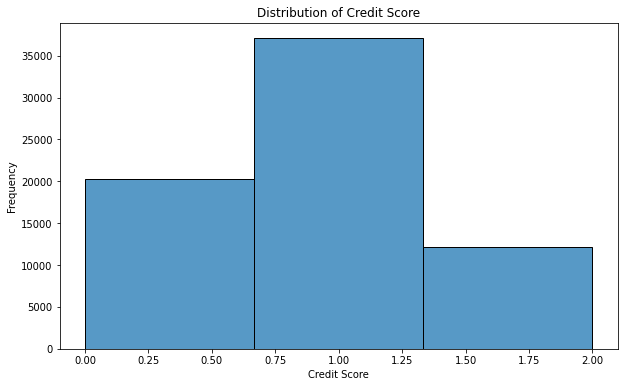

In [24]:
credit_score_pperson = df_filtered['Credit_Score']

plt.figure(figsize=(10, 6))
sns.histplot(credit_score_pperson, bins=3)
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

### Bivariate Distribution Plot

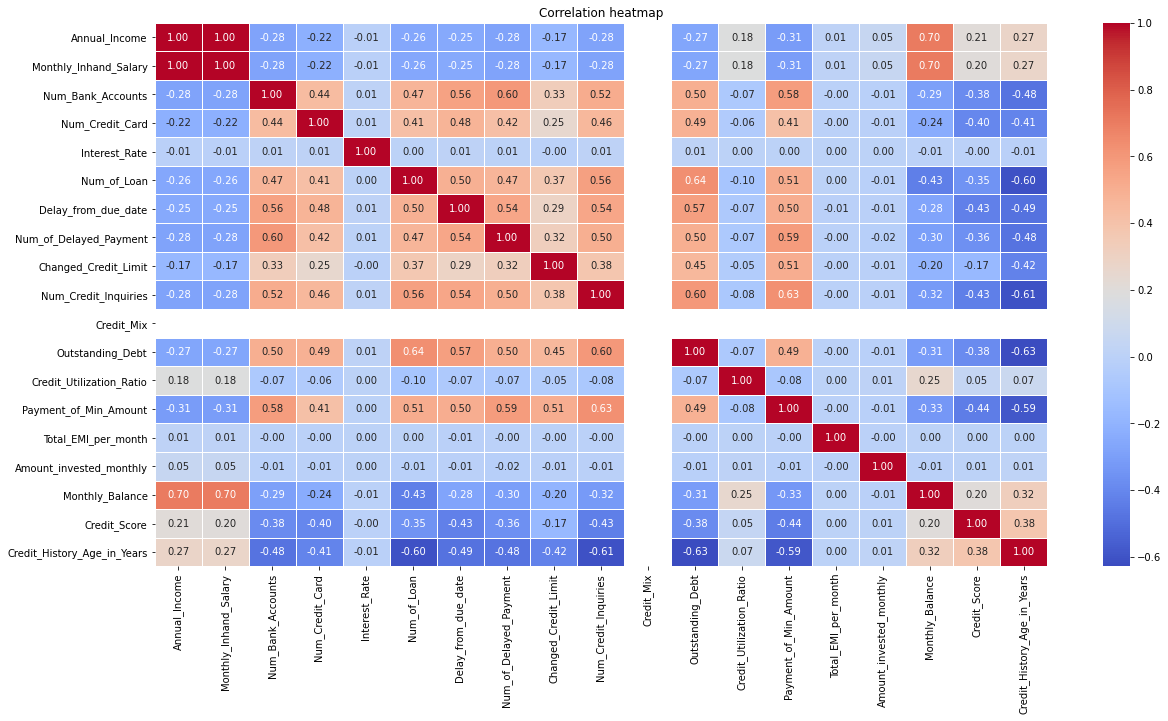

In [25]:
df_numeric = df_filtered.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation heatmap")
plt.show()

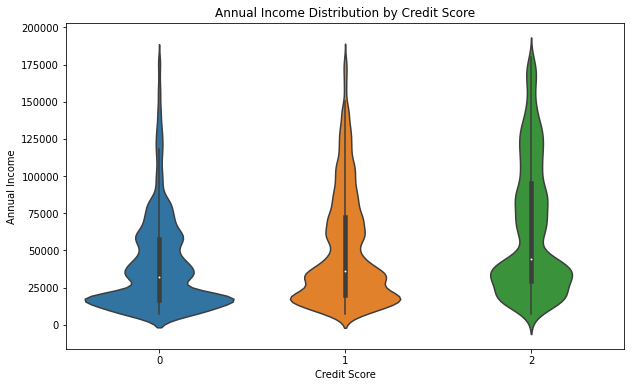

In [26]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=credit_score_pperson, y=df_filtered["Annual_Income"])
plt.title('Annual Income Distribution by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.show()

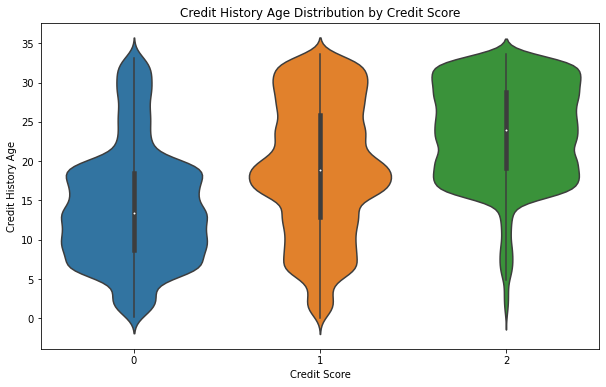

In [27]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=credit_score_pperson, y=df_filtered["Credit_History_Age_in_Years"])
plt.title('Credit History Age Distribution by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Credit History Age')
plt.show()

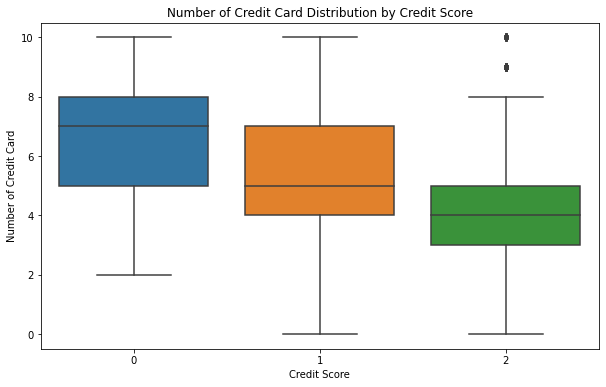

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit_score_pperson, y=df_filtered["Num_Credit_Card"])
plt.title('Number of Credit Card Distribution by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Number of Credit Card')
plt.show()

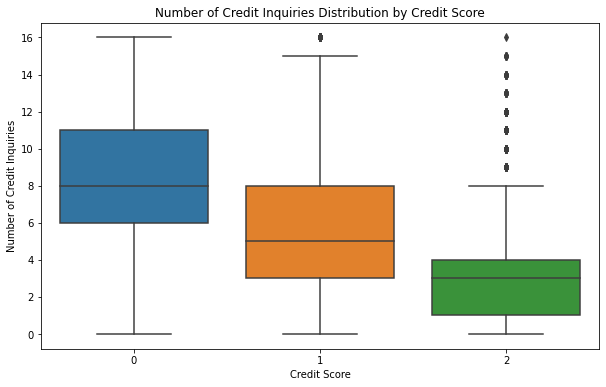

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit_score_pperson, y=df_filtered["Num_Credit_Inquiries"])
plt.title('Number of Credit Inquiries Distribution by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Number of Credit Inquiries')
plt.show()

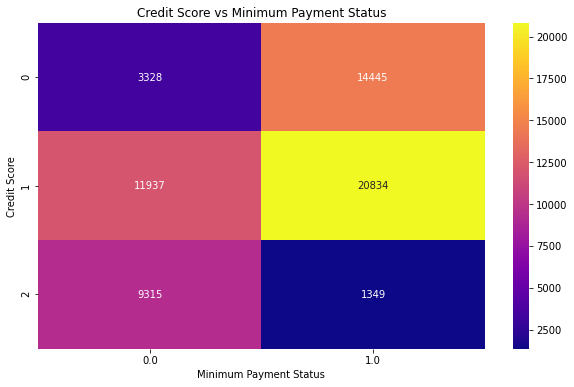

In [30]:
plt.figure(figsize=(10, 6))
cross_tab = pd.crosstab(credit_score_pperson, df_filtered["Payment_of_Min_Amount"])

sns.heatmap(cross_tab, annot=True, fmt="d", cmap="plasma")
plt.title("Credit Score vs Minimum Payment Status")
plt.xlabel("Minimum Payment Status")
plt.ylabel("Credit Score")
plt.show()

## Model Training

In [31]:
back_df = df_filtered.copy()
back_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Years
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,0.0,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2,22.083333
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,31.377862,22 Years and 4 Months,0.0,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2,22.333333
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,27.262259,22 Years and 6 Months,0.0,49.574949,62.430172,!@9#%8,340.479212,2,22.500000
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,22.537593,22 Years and 7 Months,0.0,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,2,22.583333
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,605.03,24.464031,26 Years and 7 Months,0.0,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,1,26.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,502.38,39.323569,31 Years and 5 Months,0.0,35.104023,140.581403,High_spent_Medium_value_payments,410.256158,0,31.416667
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,502.38,34.663572,31 Years and 6 Months,0.0,35.104023,60.971333,High_spent_Large_value_payments,479.866228,0,31.500000
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,502.38,40.565631,31 Years and 7 Months,0.0,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,0,31.583333
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,502.38,41.255522,31 Years and 8 Months,0.0,35.104023,24.028477,High_spent_Large_value_payments,516.809083,0,31.666667


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

df_filtered = back_df.copy()
dict = {
    'High_spent_Small_value_payments' : 0,
    'Low_spent_Large_value_payments' : 1,
    'Low_spent_Medium_value_payments' : 2,
    'Low_spent_Small_value_payments' : 3,
    'High_spent_Medium_value_payments' : 4,
    'High_spent_Large_value_payments': 5,
    '!@9#%8' : np.nan
}

df_filtered['Payment_Behaviour'] = df_filtered['Payment_Behaviour'].map(dict)
label_encoder = LabelEncoder()

df_filtered["Occupation"] = label_encoder.fit_transform(df_filtered["Occupation"])
df_filtered["Credit_Mix"] = label_encoder.fit_transform(df_filtered["Credit_Mix"])
df_filtered["Payment_of_Min_Amount"] = label_encoder.fit_transform(df_filtered["Payment_of_Min_Amount"])

df_filtered.drop("ID", axis=1, inplace=True)
df_filtered.drop("Name", axis=1, inplace=True)
df_filtered.drop("Customer_ID", axis=1, inplace=True)
df_filtered.drop("SSN", axis=1, inplace=True)
df_filtered.drop("Type_of_Loan", axis=1, inplace=True)
df_filtered.drop("Monthly_Inhand_Salary", axis=1, inplace=True)
df_filtered.drop("Credit_History_Age", axis=1, inplace=True)
df_filtered.drop("Month", axis=1, inplace=True)
df_filtered.drop(['Monthly_Balance', 'Credit_Utilization_Ratio', "Interest_Rate"], axis=1, inplace=True)
print(df_filtered.isna().sum())


Age                               0
Occupation                        0
Annual_Income                     0
Num_Bank_Accounts                 0
Num_Credit_Card                   0
Num_of_Loan                       0
Delay_from_due_date               0
Num_of_Delayed_Payment            0
Changed_Credit_Limit           1488
Num_Credit_Inquiries              0
Credit_Mix                        0
Outstanding_Debt                  0
Payment_of_Min_Amount             0
Total_EMI_per_month               0
Amount_invested_monthly        3107
Payment_Behaviour              5225
Credit_Score                      0
Credit_History_Age_in_Years    6276
dtype: int64


In [33]:
from imblearn.over_sampling import SMOTE

df_filtered = df_filtered.dropna()

X = df_filtered.drop(['Credit_Score'], axis=1)
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
y = df_filtered['Credit_Score']
X = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
sm = SMOTE(k_neighbors=7)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f123a1a9f70>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f12107a3ee0>
Traceback 

## Model Evaluations

In [42]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_sm, y_train_sm)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_sm, y_train_sm)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Random Forest Accuracy: 0.7803584491587418
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1556
           1       0.81      0.78      0.80      2937
           2       0.71      0.74      0.73       975

    accuracy                           0.78      5468
   macro avg       0.76      0.78      0.77      5468
weighted avg       0.78      0.78      0.78      5468

Gradient Boosting Accuracy: 0.6797732260424286
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1556
           1       0.75      0.68      0.71      2937
           2       0.53      0.66      0.59       975

    accuracy                           0.68      5468
   macro avg       0.65      0.68      0.66      5468
weighted avg       0.69      0.68      0.68      5468



In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_sm, y_train_sm)

# Predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.5969275786393563
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.66      0.63      1556
           1       0.76      0.50      0.60      2937
           2       0.42      0.78      0.55       975

    accuracy                           0.60      5468
   macro avg       0.59      0.65      0.59      5468
weighted avg       0.65      0.60      0.60      5468



In [68]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_sm, y_train_sm)

# Evaluate
y_pred = logistic_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Interpret coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": logistic_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)

Accuracy: 0.5969275786393563
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.66      0.63      1556
           1       0.76      0.50      0.60      2937
           2       0.42      0.78      0.55       975

    accuracy                           0.60      5468
   macro avg       0.59      0.65      0.59      5468
weighted avg       0.65      0.60      0.60      5468

                        Feature  Coefficient
6           Delay_from_due_date     0.384105
9          Num_Credit_Inquiries     0.337369
4               Num_Credit_Card     0.310224
11             Outstanding_Debt     0.253710
5                   Num_of_Loan     0.059783
12        Payment_of_Min_Amount     0.026542
3             Num_Bank_Accounts     0.013684
14      Amount_invested_monthly     0.013422
1                    Occupation     0.009873
13          Total_EMI_per_month     0.001027
10                   Credit_Mix     0.000000
15            Payment_Behav

## Predicting Credit Score and Financial Advice

In [70]:
def predict_credit_score(model, scaler, new_data):
    """
    Predict credit score for a new individual using the trained model.
    
    Args:
        model:
        scaler: From StandardScaler
        new_data: input of new person
        
    Returns:
        Predicted credit score
    """
    # Define features
    features = [
        'Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts',
        'Num_Credit_Card', 'Num_of_Loan', 'Delay_from_due_date',
        'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
        'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
        'Payment_of_Min_Amount', 'Total_EMI_per_month',
        'Amount_invested_monthly', 'Payment_Behaviour',
        'Credit_History_Age_in_Years'
    ]
    
    for feature in features:
        if feature not in new_data:
            new_data[feature] = 0
    
    new_df = pd.DataFrame([new_data])[features]
    
    scaled_data = scaler.transform(new_df)

    #Prediction
    prediction = model.predict(scaled_data)
    credit_scores = {2: "Good", 1: "Standard", 0: "Poor"}
    predicted_score = credit_scores[prediction[0]]
    
    return predicted_score


In [71]:
new_individual = {
    "Age": 35,  
    "Annual_Income": 50000, 
    "Num_Bank_Accounts": 2,
    "Num_Credit_Card": 3, 
    "Num_of_Loan": 1, 
    "Delay_from_due_date": 5, 
    "Num_of_Delayed_Payment": 1,
    "Changed_Credit_Limit": 0, 
    "Num_Credit_Inquiries": 2, 
    "Credit_Mix": 2,  
    "Outstanding_Debt": 10000,  
    "Payment_of_Min_Amount": 0, 
    "Total_EMI_per_month": 2000,  
    "Amount_invested_monthly": 500, 
    "Payment_Behaviour": 3, 
    "Credit_History_Age_in_Years": 10  
}

In [72]:
predicted_score = predict_credit_score(logistic_model, sc, new_individual)
print(f"Predicted Credit Score: {predicted_score}")

Predicted Credit Score: Poor


In [80]:
def provide_credit_advice(new_data, score, model, train_data):
    """   
    Args:
        new_data: Dictionary of feature values
        score: Predicted credit score
        model: Trained model.
        train_data: training data used to derive threshold values.
        
    Returns:
        Advice for the individual.
    """
    advice = []
    feature_importances = model.feature_importances_
    feature_names = train_data.columns

    # Sort features by importance
    important_features = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)
    print(important_features)
    # Score Advice
    if score == "Good":
        advice.append("Your credit score is good!")
    elif score == "Standard":
        advice.append("Your credit score is standard.")
    elif score == "Poor":
        advice.append("Your credit score is poor.")

    # Top 5 Features
    for feature, importance in important_features[:5]:
        if feature not in new_data:
            continue
        
        #Placeholder Comparison Values for Now
        value = new_data[feature]
        median = train_data[feature].median()
        upper_quartile = train_data[feature].quantile(0.75)
        lower_quartile = train_data[feature].quantile(0.25)

        if feature == "Outstanding_Debt":
            if value > upper_quartile:
                advice.append("Your outstanding debt is significantly higher than average.")
            elif value > median:
                advice.append("Your outstanding debt is slightly above average.")

        elif feature == "Num_of_Delayed_Payment":
            if value > upper_quartile:
                advice.append("You have many delayed payments.")

        elif feature == "Annual_Income":
            if value < lower_quartile:
                advice.append("Your income is lower than most borrowers.")
        elif feature == "Num_Credit_Inquiries":
            if value > upper_quartile:
                advice.append("You've made many recent credit inquiries.")

        elif feature == "Credit_History_Age_in_Years":
            if value < lower_quartile:
                advice.append("Your credit history is shorter than most.")
                
        elif feature == "Num_Credit_Card":
            if value > upper_quartile:
                advice.append("You have a high number of credit cards.")

        elif feature == "Total_EMI_per_month":
            if value > upper_quartile:
                advice.append("Your monthly EMI is quite high.")
                
        elif feature == "Amount_invested_monthly":
            if value < lower_quartile:
                advice.append("You're investing less than most borrowers.")

        elif feature == "Changed_Credit_Limit":
            if value > median:
                advice.append("You've frequently changed your credit limits.")
                
        elif feature == "Delay_from_due_date":
            if value > upper_quartile:
                advice.append("You often delay payments past the due date. Pay bills on or before the due date.")

                
    return "\n".join(advice)


In [81]:
predicted_score = predict_credit_score(logistic_model, sc, new_individual)
advice = provide_credit_advice(new_data=new_individual, 
                               score=predicted_score, 
                               model=rf_model, 
                               train_data=X)

print(f"Predicted Credit Score: {predicted_score}")
print("Advice:")
print(advice)

[('Outstanding_Debt', 0.1399148726265169), ('Credit_History_Age_in_Years', 0.0889820863006739), ('Delay_from_due_date', 0.08488373336654105), ('Num_Credit_Inquiries', 0.08212675237249031), ('Changed_Credit_Limit', 0.06516475552223104), ('Num_Credit_Card', 0.05913805207459192), ('Num_Bank_Accounts', 0.05805454715725011), ('Num_of_Delayed_Payment', 0.05764969905857734), ('Payment_of_Min_Amount', 0.05697897546948625), ('Annual_Income', 0.05202964557638695), ('Amount_invested_monthly', 0.048922984529382776), ('Age', 0.04824082169451854), ('Total_EMI_per_month', 0.04787567641833396), ('Num_of_Loan', 0.0393547794289292), ('Occupation', 0.03903837485669525), ('Payment_Behaviour', 0.03164424354739444), ('Credit_Mix', 0.0)]
Predicted Credit Score: Poor
Advice:
Your credit score is poor.
Your outstanding debt is significantly higher than average.
You often delay payments past the due date. Pay bills on or before the due date.
You've made many recent credit inquiries.
You've frequently changed yo

## More Personalized Advice